In [175]:
### 2. CNNs with Keras

###Adapt the example in this website https://keras.io/examples/vision/mnist_convnet/ to our problem. To this end:
#- change the number of classes and the input size
#- it is not necessary to expand the dimensions since our input is 3dimensional expand_dims(x_train, -1)
#- you may need to transopose the labels vector
#- change the categorical cross-entropy to the binary cross entropy given that our problem is binary classification. 
#- also change the softmax to sigmoid, the more appropriate activation function for binary data

#We can choose a single neuron output passed through sigmoid, and then set a threshold to choose the class, or use two neuron output and then perform a softmax.

#Can you get the accuracy better than in our hand made perceptron?

#Make a report about your adaptions to improve the results

Lab Member: Yuki Saito, Xiangi Li 

In [176]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

import numpy as np
import matplotlib.pyplot as plt
import h5py

In [177]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [178]:
def load_dataset():
    train_dataset = h5py.File('/content/drive/My Drive/dataset/train_catvnoncat.h5', "r")
    train_x = np.array(train_dataset["train_set_x"][:]) 
    train_y = np.array(train_dataset["train_set_y"][:])
    test_dataset = h5py.File('/content/drive/My Drive/dataset/test_catvnoncat.h5', "r")
    test_x = np.array(test_dataset["test_set_x"][:]) 
    test_y = np.array(test_dataset["test_set_y"][:])
    classes = np.array(test_dataset["list_classes"][:]) 
    
    train_y = train_y.reshape((1, train_y.shape[0]))
    test_y = test_y.reshape((1, test_y.shape[0]))
    
    return train_x, train_y, test_x, test_y, classes

In [179]:
# the data, split between train and test sets
x_train, y_train, x_test, y_test, classes=load_dataset()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# convert class vectors to binary class matrices
y_train = y_train.T
y_test = y_test.T


loss_criteria = "binary_crossentropy"
model_criteria = "model_softmax"

if model_criteria == "model_sigmoid":
  from keras.utils import to_categorical
  y_train = to_categorical(y_train)
  y_test = to_categorical(y_test)


print(x_train.shape)
print(y_train.shape)

(209, 64, 64, 3)
(209, 1)


In [180]:
#build the model

input_shape = (x_train.shape[1], x_train.shape[2], x_train.shape[3])
dropout_p = 0.25

from keras.layers.advanced_activations import LeakyReLU, ReLU
from keras.layers.normalization import BatchNormalization
from keras.layers.core import Activation
from keras import initializers
from keras.initializers import he_normal, TruncatedNormal


activation_ = 'relu' #LeakyReLU()

if model_criteria == "model_softmax":
  model = keras.Sequential([
    keras.Input(shape=input_shape),
    layers.Conv2D(32, kernel_size=(3, 3), activation=activation_, kernel_initializer=TruncatedNormal(mean=0.0, stddev=0.05, seed=2)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation=activation_, kernel_initializer=TruncatedNormal(mean=0.0, stddev=0.1, seed=1)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dropout(dropout_p),
    layers.Dense(2, activation='softmax', kernel_initializer=he_normal()),
  ])
  model.summary()

elif model_criteria == "model_sigmoid":
  model = keras.Sequential([
    keras.Input(shape=input_shape),
    layers.Conv2D(16, kernel_size=(3, 3), activation=activation_,kernel_initializer=TruncatedNormal(mean=0.0, stddev=0.1, seed=1)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(32, kernel_size=(3, 3), activation=activation_,kernel_initializer=TruncatedNormal(mean=0.0, stddev=1.0, seed=2)), 
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dropout(dropout_p),
    layers.Dense(1, activation='sigmoid',kernel_initializer=he_normal())
  ])
  model.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_39 (Conv2D)           (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_39 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_19 (Flatten)         (None, 12544)             0         
_________________________________________________________________
dropout_19 (Dropout)         (None, 12544)             0         
_________________________________________________________________
dense_19 (Dense)             (None, 2)               

In [181]:
#comiple and fit
from keras.optimizers import RMSprop, Adam, SGD
bs_ = 32
epochs_ = 20
# Adam, SGD, RMSProp
optimizer_ = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
#SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

model.compile(loss=loss_criteria, optimizer=optimizer_, metrics=["accuracy"])
history = model.fit(x_train, y_train, batch_size=bs_, epochs=epochs_, validation_split=0.1)


Epoch 1/20
47/47 [==============================] - 1s 27ms/step - loss: 0.7000 - accuracy: 0.4415 - val_loss: 0.6932 - val_accuracy: 0.5714
Epoch 2/20
47/47 [==============================] - 1s 24ms/step - loss: 0.6932 - accuracy: 0.4362 - val_loss: 0.6932 - val_accuracy: 0.5714
Epoch 3/20
47/47 [==============================] - 1s 24ms/step - loss: 0.6932 - accuracy: 0.4628 - val_loss: 0.6932 - val_accuracy: 0.5238
Epoch 4/20
47/47 [==============================] - 1s 24ms/step - loss: 0.6932 - accuracy: 0.5160 - val_loss: 0.6932 - val_accuracy: 0.4762
Epoch 5/20
47/47 [==============================] - 1s 24ms/step - loss: 0.6932 - accuracy: 0.4894 - val_loss: 0.6932 - val_accuracy: 0.4762
Epoch 6/20
47/47 [==============================] - 1s 24ms/step - loss: 0.6932 - accuracy: 0.5479 - val_loss: 0.6932 - val_accuracy: 0.4762
Epoch 7/20
47/47 [==============================] - 1s 24ms/step - loss: 0.6932 - accuracy: 0.4574 - val_loss: 0.6932 - val_accuracy: 0.5238
Epoch 8/20
47

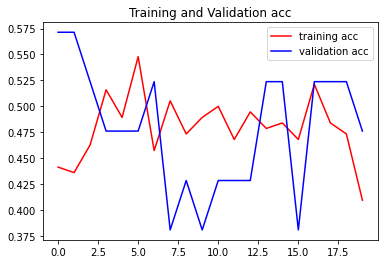

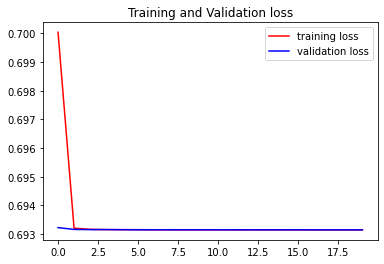

In [182]:
def show_training_process(history):
  import matplotlib.pyplot as plt
  # Setting Parameters
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  epochs = range(len(acc))

  # 1) Accracy Plt
  plt.plot(epochs, acc, 'r' ,label = 'training acc')
  plt.plot(epochs, val_acc, 'b' , label= 'validation acc')
  plt.title('Training and Validation acc')
  plt.legend()
  plt.figure()

  # 2) Loss Plt
  plt.plot(epochs, loss, 'r' ,label = 'training loss')
  plt.plot(epochs, val_loss, 'b' , label= 'validation loss')
  plt.title('Training and Validation loss')
  plt.legend()
  plt.show()


show_training_process(history)

In [183]:
#evaluate
print('***configuration of your model**')
print('the last leyer with : ', model_criteria, ' activation')
print('loss : ', loss_criteria, "\n\n")
score = model.evaluate(x_train, y_train, verbose=0)
print("Train loss:", score[0])
print("Train accuracy:", score[1], "\n")
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

***configuration of your model**
the last leyer with :  model_softmax  activation
loss :  binary_crossentropy 


Train loss: 0.6931476593017578
Train accuracy: 0.5167464017868042 

Test loss: 0.6931482553482056
Test accuracy: 0.5


Report:



# **1. model explanation**

  For this fully supervised learning task using CNN, I employed networks with 2 convolution layers and 2 max-pooling layers. 
Since, this is a binary classification task, the last fully connected layer (Dense) have 2 possibilities,
* output 1 dim with sigmoid activation
* output 2 dim with softmax activation
I tried to optimize both models here.

  This model is not so deep and dataset used here is not so large, only contains 209 training images. so, there is a high possibility to occur overfitting and to avoid this, I used dropout layer before the last fully connected layer with probability=25%.  Also, the initial wight seems to be important in this task and the weight should not have so large values. so, the weight of Conv2d is initialized by truncated normal distribution with mean=0, stddev=0~1. If I use higher stddev, the validation loss havd relatively large value and the loss curve didn't converge. so, I tried to use smaller stddev. In addition, the activation function of Conv2d is LeakyRelu(). LeakyRelu is different from Relu at the x<0 (x is horizontal axis) and the output value is not changed to 0 at x<0. At the first part of this lab, I used Relu activation, but the Relu has drawback that the it may causes dead neurons,so I considered it is better to use a small slope in x <0 by introducing LeakyRelu().


# **2. experiment**
  I split our dataset into train:val=9:1 and hired binary cross entropy loss for training. I used Adam optimizer with learning rate=0.001, beta_1=0.9, beta_2=0.999. The batchsize is 64 and the models are converged in 20 epochs.    
  In the experiment I used my own implementation of single layer perceptron in the first part of this lab. Seeting this implementation as baseline, I compared the accuracy of keras CNNs. This baseline approach is implemented on first jupyter-notebook(04-Introduction to NNs-sv) and we trained it with 30000 iterations and optimize it with gradient descent learning rate=0.001.



# **3. result and conclusion**
Table1 below shows the best test accuracy of each models. I can improve the accuracy for test data compared with my hand-made model of numpy. Since, the network of this keras model is deeper than my single layer perceptron, the nectwork could aquire better features from images. (It is usually considered that the model has deeper layers, the accuracy is better ). Also Convolution calculates image spatial features (edges etc..) and is robust to position changing in a image, CNN is so prefarable approach for ML task using images among DNNs. 
---


In [184]:
import pandas as pd
print('               Table1: test accuracy of keras CNN models   ')
list = [
[81.999], 
[83.999], 
[74.00]
]
ind = ['model with sigmoid activation', 'model with softmax activation', 'baseline(my implementation of single layer perceptron)']
col = ['test accuracy (%)']

df = pd.DataFrame(list, index=ind, columns=col)
df

               Table1: test accuracy of keras CNN models   


,test accuracy (%)
model with sigmoid activation,81.999
model with softmax activation,83.999
baseline(my implementation of single layer perceptron),74.000
